In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Manifold Learning (다양체 학습)

*   높은 차원의 데이터를 저차원으로 축소하는 방법 (차원 축소, Dimension reduction)

*   고차원 데이터를 2차원 또는 3차원으로 축소해서 '시각화'에 활용 가능함.

*   차원 축소 과정에서 중요하지 않은 정보는 제거되며 중요한 정보만 남기 때문에 전처리 용으로도 활용 가능하다. 

LLE 계열 : LLE / LTSA / Hessian LLE / Modified LLE

Isomap / MDS / SE / t-SNE 등


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import manifold
from sklearn import random_projection
from sklearn import datasets

In [ ]:
s_curve, color = datasets.make_s_curve(1000, random_state = 0)

digits, labels = datasets.load_digits(return_X_y = True)
rand_proj = random_projection.SparseRandomProjection(n_components = 3, random_state = 0)
projected_digits = rand_proj.fit_transform(digits)

print(s_curve.shape)
print(projected_digits.shape)

(1000, 3)
(1797, 3)


In [ ]:
def min_max_scale(x):
  min_value = np.min(x, 0)
  max_value = np.max(x, 0)

  x = (x - min_value) / (max_value - min_value)

  return x


def plot_s_curve(s_curve, color, position, projection):
  s_curve = min_max_scale(s_curve)

  print(s_curve.shape)

  if projection == '3d':
    ax = plt.subplot(position, projection = projection)
    ax.scatter(s_curve[:, 0], s_curve[:, 1], s_curve[:, 2], c = color, cmap = plt.cm.Spectral)
    ax.view_init(4, -72)

  elif projection == '2d':
    ax = plt.subplot(position)
    ax.scatter(s_curve[:, 0], s_curve[:, 1], c = color, cmap = plt.cm.Spectral)




def plot_digits(digits, labels, position, projection):
  digits = min_max_scale(digits)

  print(digits.shape)

  if projection == '3d':
    ax = plt.subplot(position, projection = projection)
    for i in range(digits.shape[0]):
      ax.text(digits[i, 0], digits[i, 1], digits[i, 2], str(labels[i]),
              color = plt.cm.Set1(labels[i] / 10), fontdict = {'weight':'bold', 'size' : 9})
    ax.view_init(4, -72)
  
  elif projection == '2d':
    ax = plt.subplot(position)
    for i in range(digits.shape[0]):
      ax.text(digits[i, 0], digits[i, 1], str(labels[i]),
              color = plt.cm.Set1(labels[i] / 10.), fontdict = {'weight' : 'bold', 'size' : 9})
      


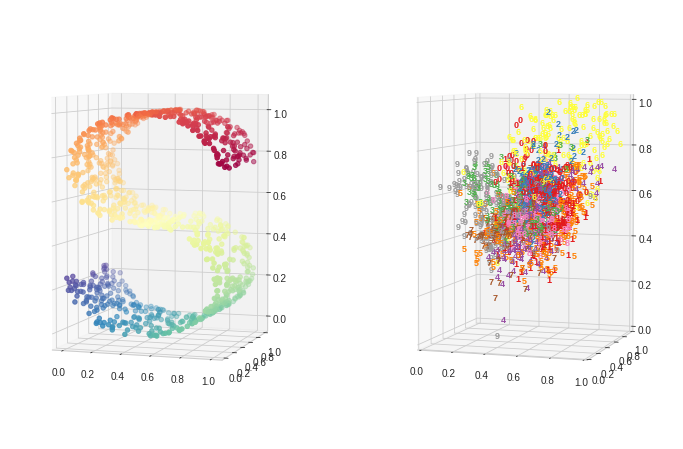

In [ ]:
fig = plt.figure(figsize = (12,8))
plot_s_curve(s_curve, color, 121, '3d')
plot_digits(projected_digits, labels, 122, '3d')

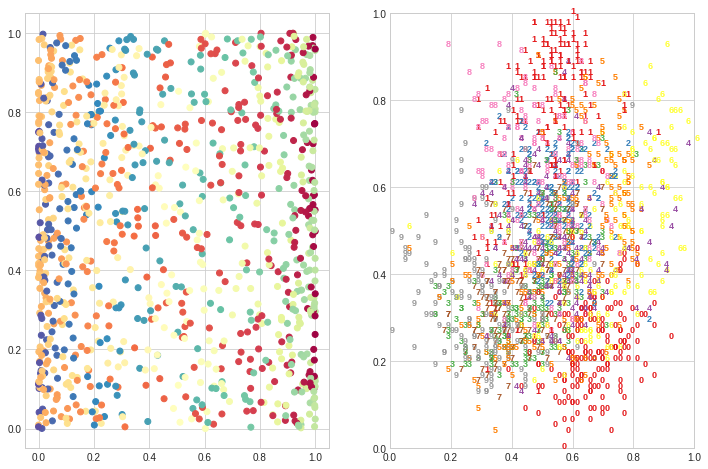

In [ ]:
fig = plt.figure(figsize = (12,8))
plot_s_curve(s_curve, color, 121, '2d')
plot_digits(projected_digits, labels, 122, '2d')

# Locally Linear Embedding (LLE)

*  국소 이웃 거리를 보존하면서 저차원 임베딩을 탐색

*  단순히 이웃간의 거리를 기반으로만 유지한다는 제한점이 발생함.

In [ ]:
s_curve_lle = manifold.LocallyLinearEmbedding(n_neighbors = 30, n_components = 2,
                                              method = 'standard', random_state = 0)
s_curve_lle = s_curve_lle.fit_transform(s_curve)

digits_lle = manifold.LocallyLinearEmbedding(n_neighbors = 30, n_components = 3,
                                             method = 'standard', random_state = 0)
digits_lle = digits_lle.fit_transform(digits)


(1000, 2)
(1797, 3)


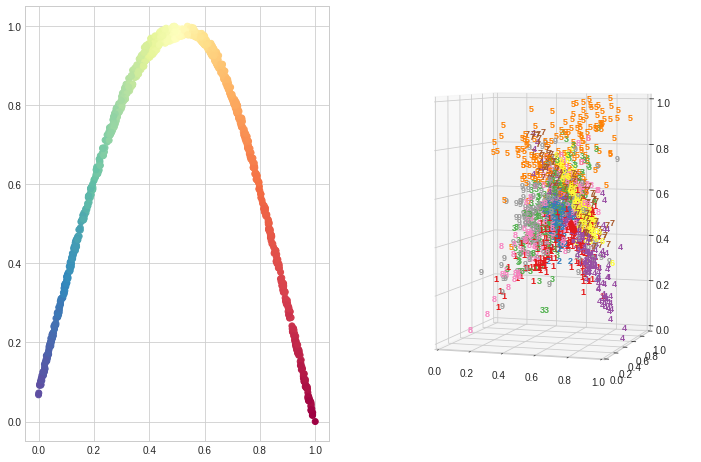

In [ ]:
fig = plt.figure(figsize = (12,8))
plot_s_curve(s_curve_lle, color, 121, '2d')
plot_digits(digits_lle, labels, 122, '3d')

# Local Tangent Space Alignment (LTSA)

*  탄젠트 공간을 통해 각 이웃의 국소 성질을 특성화

*  국소 탄젠트 공간을 정렬

In [ ]:
s_curve_ltsa = manifold.LocallyLinearEmbedding(n_neighbors = 30, n_components = 2,
                                               method = 'ltsa', random_state = 0).fit_transform(s_curve)

digits_ltsa = manifold.LocallyLinearEmbedding(n_neighbors = 30, n_components = 3,
                                               method = 'ltsa', random_state = 0).fit_transform(digits)

(1000, 2)
(1797, 3)


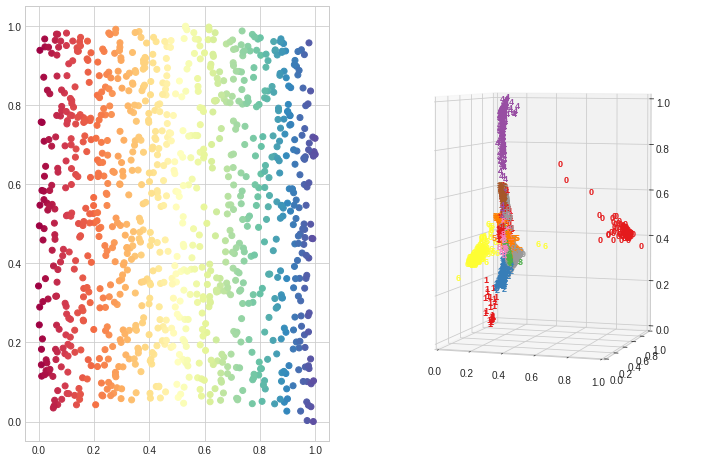

In [ ]:
fig = plt.figure(figsize = (12,8))
plot_s_curve(s_curve_ltsa, color, 121, '2d')
plot_digits(digits_ltsa, labels, 122, '3d')

# Hessian Eigenmapping

*   국소 선형 구조를 복원하기 위해 각 이웃에서 hessian 기반의 이차 형태를 중심으로 '회전'하여 LLE의 문제를 해결

Hessian LLE


In [ ]:
s_curve_hlle = manifold.LocallyLinearEmbedding(n_neighbors = 30, n_components = 2,
                                               method = 'hessian', random_state = 0).fit_transform(s_curve)

digits_hlle = manifold.LocallyLinearEmbedding(n_neighbors = 30, n_components = 3,
                                               method = 'hessian', random_state = 0).fit_transform(digits)

(1000, 2)
(1797, 3)


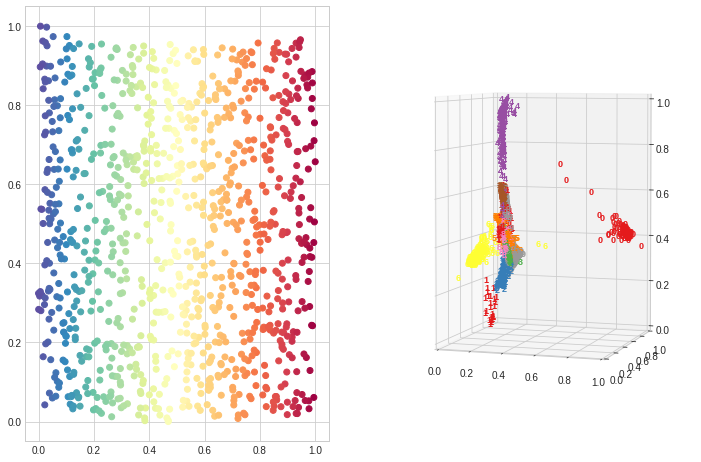

In [ ]:
fig = plt.figure(figsize = (12,8))
plot_s_curve(s_curve_hlle, color, 121, '2d')
plot_digits(digits_hlle, labels, 122, '3d')

# Modified Locally Linear Embedding

*  각 이웃에 여러 가중치 벡터를 사용

*  조건 : n_neighbors > n_components

Modified LLE

In [ ]:
s_curve_mlle = manifold.LocallyLinearEmbedding(n_neighbors = 30, n_components = 2,
                                               method = 'modified', random_state = 0).fit_transform(s_curve)

digits_mlle = manifold.LocallyLinearEmbedding(n_neighbors = 30, n_components = 3,
                                               method = 'modified', random_state = 0).fit_transform(digits)

(1000, 2)
(1797, 3)


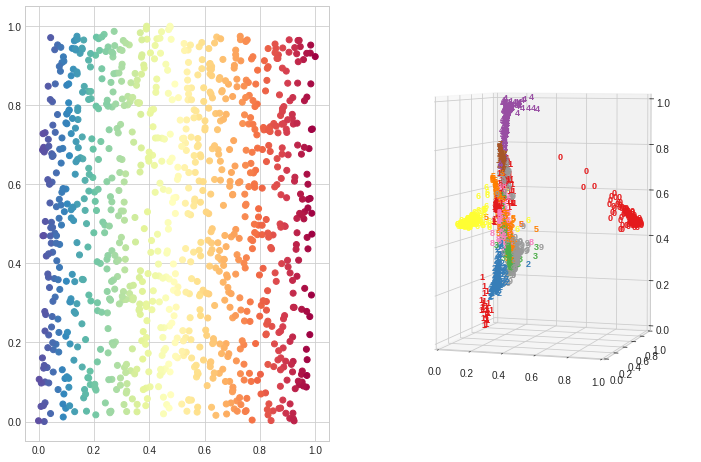

In [ ]:
fig = plt.figure(figsize = (12,8))
plot_s_curve(s_curve_mlle, color, 121, '2d')
plot_digits(digits_mlle, labels, 122, '3d')

# Isomap

*   초창기의 manifold learning 알고리즘

*   MDS와 kernel PCA의 확장형

*   모든 데이터 사이의 측지 거리를 유지하는 저차원 임베딩

In [ ]:
s_curve_isomap = manifold.Isomap(n_neighbors = 30, n_components = 2).fit_transform(s_curve)
digits_isomap = manifold.Isomap(n_neighbors = 30, n_components = 3).fit_transform(digits)

(1000, 2)
(1797, 3)


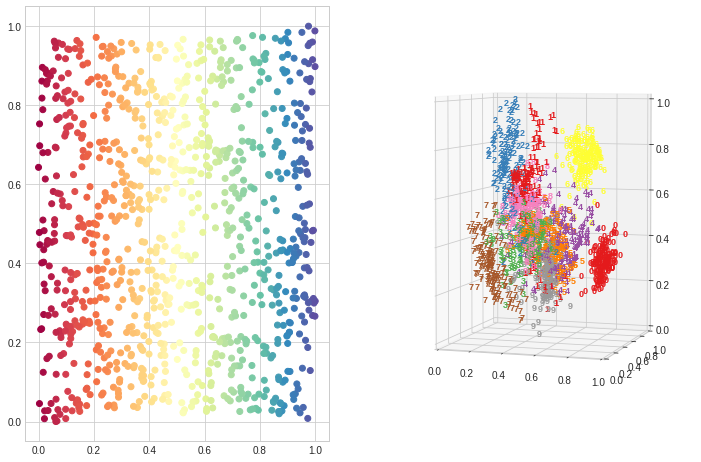

In [ ]:
fig = plt.figure(figsize = (12,8))
plot_s_curve(s_curve_isomap, color, 121, '2d')
plot_digits(digits_isomap, labels, 122, '3d')

# Multi-Dimensional Scalling (MDS)

*   역시 고전적인 manifold learning 알고리즘

*   고차원 공간에서의 거리를 고려하는 저차원 공간을 탐색

In [ ]:
s_curve_mds = manifold.MDS( n_components = 2, random_state = 0).fit_transform(s_curve)
digits_mds = manifold.MDS( n_components = 3, random_state = 0).fit_transform(digits)

(1000, 2)
(1797, 3)


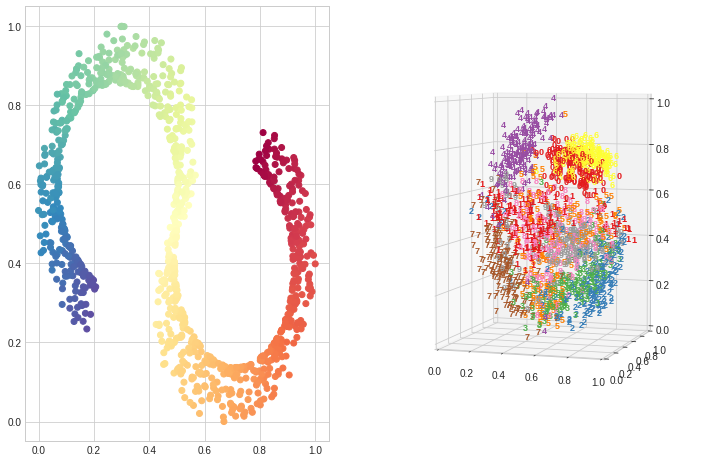

In [ ]:
fig = plt.figure(figsize = (12,8))
plot_s_curve(s_curve_mds, color, 121, '2d')
plot_digits(digits_mds, labels, 122, '3d')

# Spectral Embedding

*   스펙트럼 분해를 통해 데이터의 저차원 표현을 탐색

*   데이터가 저차원 공간에서도 서로 가깝게 유지되도록 하는것이 목적

In [ ]:
print(s_curve.shape)
s_curve_se = manifold.SpectralEmbedding( n_components = 2, random_state = 0).fit_transform(s_curve)

print(digits.shape)
digits_se = manifold.SpectralEmbedding( n_components = 3, random_state = 0).fit_transform(digits)

(1000, 3)
(1797, 64)


(1000, 2)
(1797, 3)


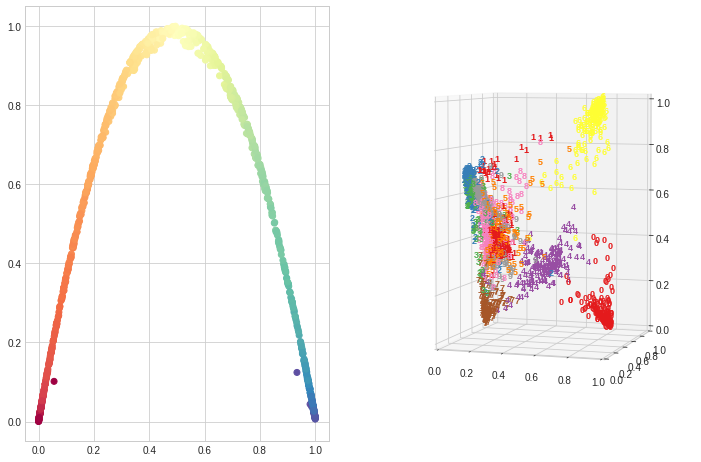

In [ ]:
fig = plt.figure(figsize = (12,8))
plot_s_curve(s_curve_se, color, 121, '2d')
plot_digits(digits_se, labels, 122, '3d')

# t-distributed Stochastic Neighbor Embedding (t-SNE)

*   비교적 최근 알고리즘

*   데이터 포인트의 유사성을 확률로 변환

*   국소 구조에 민감, 국소 구조를 기반으로 샘플 그룹을 추출하는데 강함.

*   항상 KL 발산의 국소 최소값으로 종료.

*   시간이 오래 걸림. 전역 구조를 보존하지 않음.

In [ ]:
s_curve_tsne = manifold.TSNE( n_components = 2, random_state = 0).fit_transform(s_curve)
digits_tsne = manifold.TSNE( n_components = 3, random_state = 0).fit_transform(digits)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1000, 2)
(1797, 3)


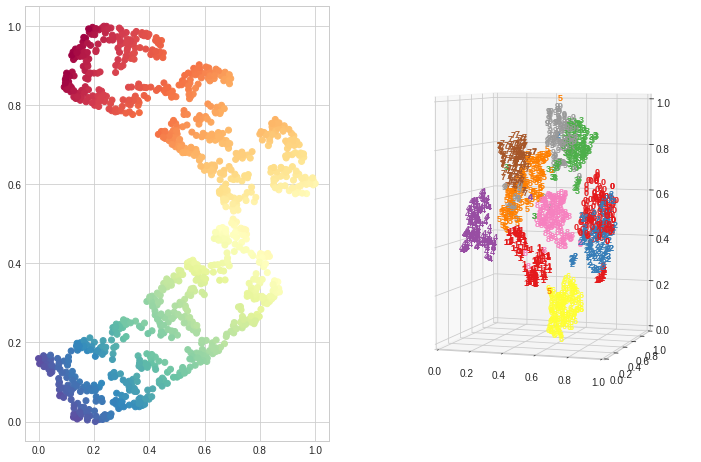

In [ ]:
fig = plt.figure(figsize = (12,8))
plot_s_curve(s_curve_tsne, color, 121, '2d')
plot_digits(digits_tsne, labels, 122, '3d')

# 차원 축소 후 학습에 적용 가능

Manifold learning의 결과를 사용 가능

대개 t-SNE 혹은 kernel PCA를 활용한다.
